# MACD Exploración de Datos Grupo R
### Integrantes del Grupo:
<ul>
    <li>
Jose Alfredo Peto Martinez
    </li>
    <li>
Alvaro Miguel Toriz Proenza
    </li>
    <li>
Carlos Antonio Rico Martínez
    </li>
</ul>

### Objetivos:

<ul>
    <li>
Describe cual es la relación de tu variable objetivo con las demás variables presentes.
    </li>
    <li>
Determina cuales son las variables que tienen mayor correlación con tu objetivo. 
    </li>
    <li>
Aplica ingeniería de características para diseñar nuevas características en tu conjunto de datos. 
    </li>
    <li>
Modela tus datos de dos o más formas diferentes para comparar los resultados.
    </li>
</ul>


![](https://toriz.net/images/Energy_Predictor_2022-10-05%2019-44-35.jpg)

https://www.kaggle.com/competitions/ashrae-energy-prediction

## Relación de nuestra variable objetivo con las demás variables presentes

Este ejercicio trata de la construcción de modelos a través de las tasas de uso históricas y el clima observado sobre el uso de energía medido en edificios en las siguientes áreas: medidores de agua helada, electricidad, agua caliente y vapor. Los datos provienen de más de 1000 edificios en varios sitios diferentes alrededor del mundo, durante un período de tres años. Una vez que se reacondiciona un edificio, el consumo de energía nuevo (más bajo) se compara con los valores modelados del edificio original para calcular los ahorros de la modernización.

La variable meta es meter_reading, que se refiere al consumo de energía en kWh.

Las variables que se relacionan con la variable meta son: 
<ul>
    <li>
primary_use: indicador de la categoría principal de actividades para el edificio según las definiciones de tipo de propiedad de EnergyStar
    </li>
    <li>
square_feet - Superficie bruta del edificio
            </li>
    <li>
year_built - Año en que se inauguró el edificio
            </li>
    <li>
floor_count - Número de pisos del edificio
            </li>
    <li>
air_temperature - Grados Celsius
            </li>
    <li>
cloud_coverage - Porción del cielo cubierta de nubes, en octas
            </li>
    <li>
dew_temperature - Grados Celsius
            </li>
    <li>
precip_depth_1_hr - Milímetros
            </li>
    <li>
sea_level_pression - Milibar/hectopascales
            </li>
    <li>
wind_direction - Dirección de la brújula (0-360)
            </li>
    <li>
wind_speed - Metros por segundo
    </li>
    </ul>

## Variables que tienen mayor correlación con nuestro objetivo

Después de la visualización de los datos, se eliminan las siguientes variables: 'year_built', 'floor_count', 'wind_direction', 'dew_temperature'. También de acuerdo con esta visualización, se puede considerar que las que tienen una mayor relación con nuestro objetivo son: 'air_temperature', 'wind_speed', 'precip_depth_1_hr', 'cloud_coverage', 'square_feet' y 'primary_use'

## Nuevas características en nuestro conjunto de datos en base a ingeniería de características

Se crearon las siguientes nuevas características, a partir de la variable 'primary_use':
<ul>
    <li>
'primary_use_Education'
    </li>
    <li>
'primary_use_Entertainment/public assembly'
    </li>
    <li>
'primary_use_Food sales and service'
    </li>
    <li>
'primary_use_Healthcare'
    </li>
    <li>
'primary_use_Lodging/residential'
    </li>
    <li>
'primary_use_Manufacturing/industrial'
    </li>
    <li>
'primary_use_Office'
    </li>
    <li>
'primary_use_Other'
    </li>
    <li>
'primary_use_Parking'
    </li>
    <li>
'primary_use_Public services'
    </li>
    <li>
'primary_use_Religious worship'
    </li>
    <li>
'primary_use_Retail'
    </li>
    <li>
'primary_use_Services'
    </li>
    <li>
'primary_use_Technology/science'
    </li>
    <li>
'primary_use_Utility'
    </li>
    <li>
'primary_use_Warehouse/storage'
    </li>
    </ul>

## Modelación de nuestros datos de dos formas diferentes para comparar los resultados

In [1]:
import numpy as np
import pandas as pd
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error
import matplotlib.pyplot as plt
import datetime
from sklearn import metrics
import seaborn as sns
import sklearn.ensemble as ske
import gc
import os
from sklearn.linear_model import LinearRegression,SGDRegressor,ElasticNet,Ridge
from sklearn.metrics import mean_absolute_error
from sklearn.tree import DecisionTreeRegressor

In [2]:
# Archivos presentes en el Input
print(os.listdir('../input/ashrae-energy-prediction'))

['sample_submission.csv', 'building_metadata.csv', 'weather_train.csv', 'weather_test.csv', 'train.csv', 'test.csv']


In [3]:
# Función para leer y hacer una primera revisión de los datos
def read_and_interpret_data(filename):
    path = "../input/ashrae-energy-prediction"
    df = pd.read_csv('{0}/{1}'.format(path,filename))
    print("~~~~~~Perfil de los datos~~~~~~ : ",df.shape)
    print("~~~~~~Columnas con su datatype~~~~~~ : ")
    print(df.info())
    print("~~~~~~Primeros datos~~~~~~ : ")
    print(df.head())
    print("~~~~~~Últimos datos~~~~~~ : ")
    print(df.tail())
    print("~~~~~~Descripción de los datos~~~~~~ : ")
    print(df.describe())
    print("~~~~~~Datos faltantes~~~~~~ : ")
    print(df.isna().sum())
    if 'timestamp' in df.columns: 
        df['timestamp'] = pd.to_datetime(df['timestamp'],format = "%Y-%m-%d %H:%M:%S")
        print("~~~~~~Años de los datos~~~~~~ :")
        print(df.timestamp.dt.year.unique())
    return df

In [4]:
df_train = read_and_interpret_data('train.csv')

~~~~~~Perfil de los datos~~~~~~ :  (20216100, 4)
~~~~~~Columnas con su datatype~~~~~~ : 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20216100 entries, 0 to 20216099
Data columns (total 4 columns):
 #   Column         Dtype  
---  ------         -----  
 0   building_id    int64  
 1   meter          int64  
 2   timestamp      object 
 3   meter_reading  float64
dtypes: float64(1), int64(2), object(1)
memory usage: 616.9+ MB
None
~~~~~~Primeros datos~~~~~~ : 
   building_id  meter            timestamp  meter_reading
0            0      0  2016-01-01 00:00:00            0.0
1            1      0  2016-01-01 00:00:00            0.0
2            2      0  2016-01-01 00:00:00            0.0
3            3      0  2016-01-01 00:00:00            0.0
4            4      0  2016-01-01 00:00:00            0.0
~~~~~~Últimos datos~~~~~~ : 
          building_id  meter            timestamp  meter_reading
20216095         1444      0  2016-12-31 23:00:00          8.750
20216096         1445  

In [5]:
df_weather_train = read_and_interpret_data('weather_train.csv')

~~~~~~Perfil de los datos~~~~~~ :  (139773, 9)
~~~~~~Columnas con su datatype~~~~~~ : 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 139773 entries, 0 to 139772
Data columns (total 9 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   site_id             139773 non-null  int64  
 1   timestamp           139773 non-null  object 
 2   air_temperature     139718 non-null  float64
 3   cloud_coverage      70600 non-null   float64
 4   dew_temperature     139660 non-null  float64
 5   precip_depth_1_hr   89484 non-null   float64
 6   sea_level_pressure  129155 non-null  float64
 7   wind_direction      133505 non-null  float64
 8   wind_speed          139469 non-null  float64
dtypes: float64(7), int64(1), object(1)
memory usage: 9.6+ MB
None
~~~~~~Primeros datos~~~~~~ : 
   site_id            timestamp  air_temperature  cloud_coverage  \
0        0  2016-01-01 00:00:00             25.0             6.0   
1        0  2016-01-

In [6]:
DATA_PATH = "../input/ashrae-energy-prediction/"
Weather_Train = pd.read_csv(DATA_PATH + 'weather_train.csv')
Weather_Test= weather_df = pd.read_csv(DATA_PATH + 'weather_test.csv')
Test= pd.read_csv(DATA_PATH +'test.csv')
Train= pd.read_csv(DATA_PATH +'train.csv')
Building= pd.read_csv(DATA_PATH +'building_metadata.csv')

In [7]:
# Función para la reducción de uso de memoria
def reduce_mem_usage(df):
    """ itera a través de todas las columnas de un "dataframe" y modificar el tipo de datos
         para reducir el uso de la memoria.        
    """
    start_mem = df.memory_usage().sum() / 1024**2
    print('El uso de memoria del "dataframe" es {:.2f} MB'.format(start_mem))
    
    for col in df.columns:
        col_type = df[col].dtype
        
        if col_type != object:
            c_min = df[col].min()
            c_max = df[col].max()
            if str(col_type)[:3] == 'int':
                if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
                    df[col] = df[col].astype(np.int8)
                elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
                    df[col] = df[col].astype(np.int16)
                elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
                    df[col] = df[col].astype(np.int32)
                elif c_min > np.iinfo(np.int64).min and c_max < np.iinfo(np.int64).max:
                    df[col] = df[col].astype(np.int64)  
            else:
                if c_min > np.finfo(np.float16).min and c_max < np.finfo(np.float16).max:
                    df[col] = df[col].astype(np.float16)
                elif c_min > np.finfo(np.float32).min and c_max < np.finfo(np.float32).max:
                    df[col] = df[col].astype(np.float32)
                else:
                    df[col] = df[col].astype(np.float64)
        else:
            df[col] = df[col].astype('category')
    
    end_mem = df.memory_usage().sum() / 1024**2
    print('El uso de memoria después de la optimización es: {:.2f} MB'.format(end_mem))
    print('Disminuido en {:.1f}%'.format(100 * (start_mem - end_mem) / start_mem))
    return df

In [8]:
Train = reduce_mem_usage(Train)
Test = reduce_mem_usage(Test)
Weather_Train = reduce_mem_usage(Weather_Train)
Weather_Test = reduce_mem_usage(Weather_Test)
Building = reduce_mem_usage(Building)

El uso de memoria del "dataframe" es 616.95 MB
El uso de memoria después de la optimización es: 173.84 MB
Disminuido en 71.8%
El uso de memoria del "dataframe" es 1272.51 MB
El uso de memoria después de la optimización es: 358.53 MB
Disminuido en 71.8%
El uso de memoria del "dataframe" es 9.60 MB
El uso de memoria después de la optimización es: 2.59 MB
Disminuido en 73.1%
El uso de memoria del "dataframe" es 19.04 MB
El uso de memoria después de la optimización es: 5.13 MB
Disminuido en 73.0%
El uso de memoria del "dataframe" es 0.07 MB
El uso de memoria después de la optimización es: 0.02 MB
Disminuido en 73.9%


In [9]:
results = Building.merge(Train,left_on='building_id',right_on='building_id',how='left')
data = results.merge(Weather_Train,left_on=['site_id','timestamp'],right_on=['site_id','timestamp'],how='left')
data.columns

Index(['site_id', 'building_id', 'primary_use', 'square_feet', 'year_built',
       'floor_count', 'meter', 'timestamp', 'meter_reading', 'air_temperature',
       'cloud_coverage', 'dew_temperature', 'precip_depth_1_hr',
       'sea_level_pressure', 'wind_direction', 'wind_speed'],
      dtype='object')

In [10]:
def plot_hist(df,var_name):
    plt.figure(figsize=(17,8))
    plt.hist(df[var_name],bins = 50)
    plt.title(f"Histogram - {var_name}")
    plt.show()

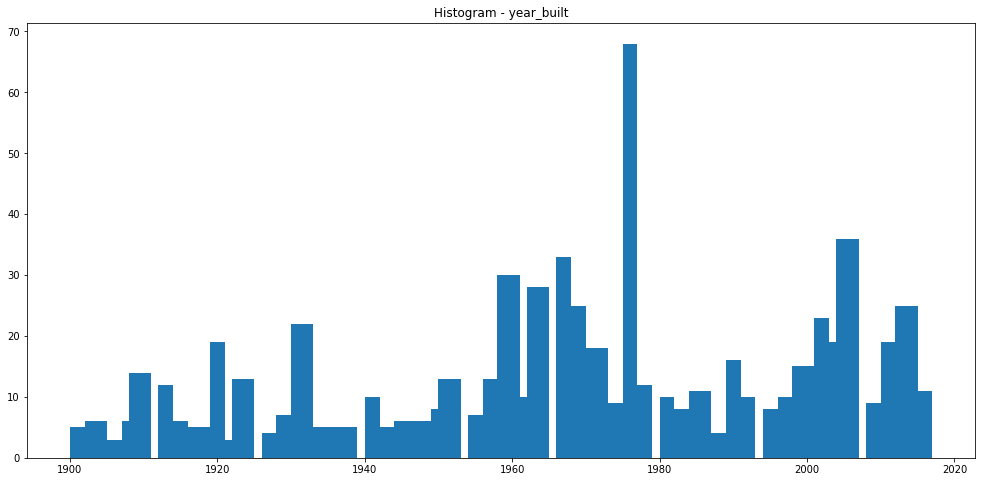

In [11]:
plot_hist(Building,'year_built')

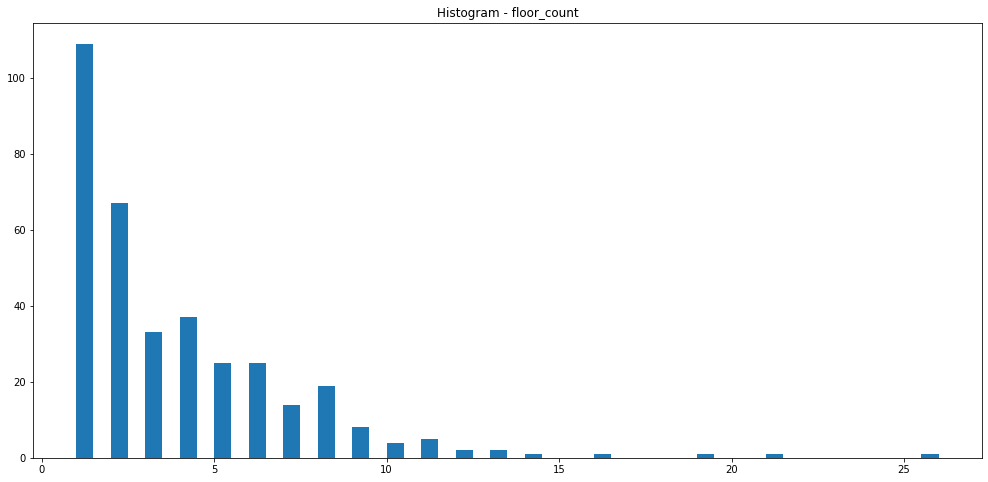

In [12]:
plot_hist(Building,'floor_count')

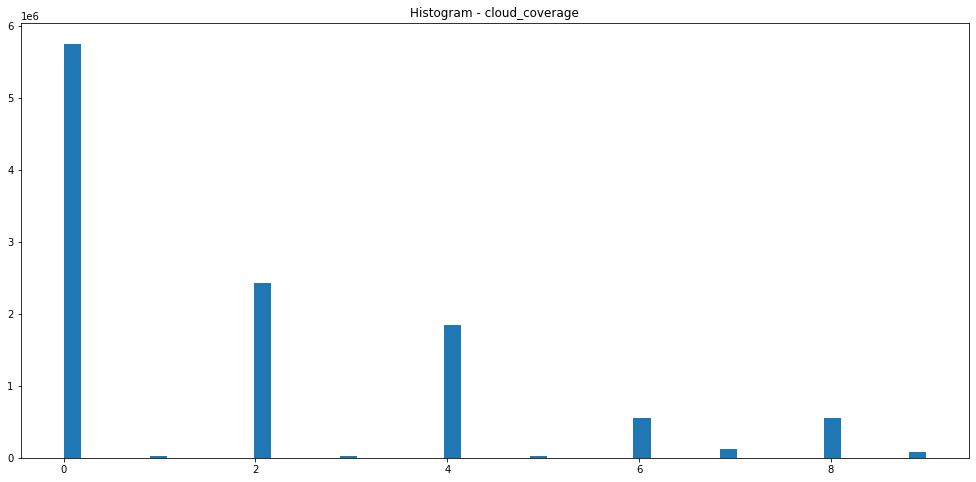

In [13]:
plot_hist(data,'cloud_coverage')

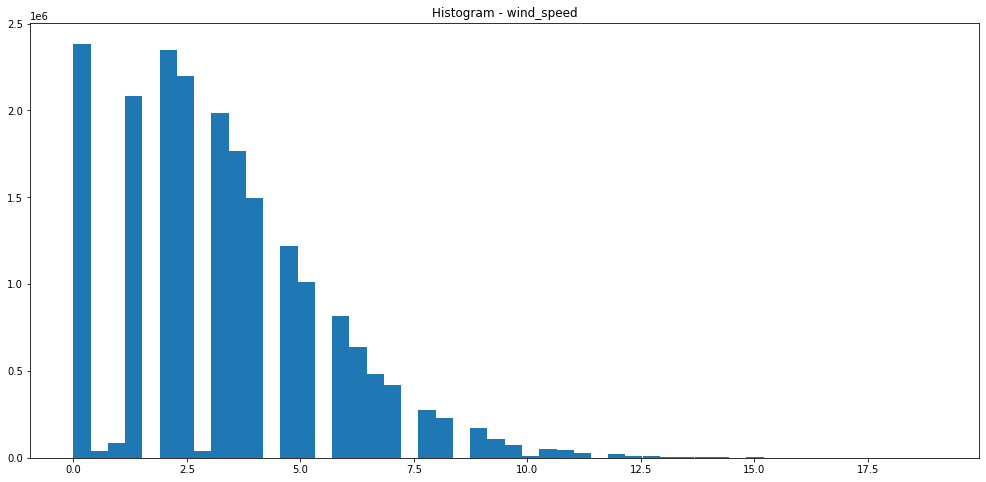

In [14]:
plot_hist(data,'wind_speed')

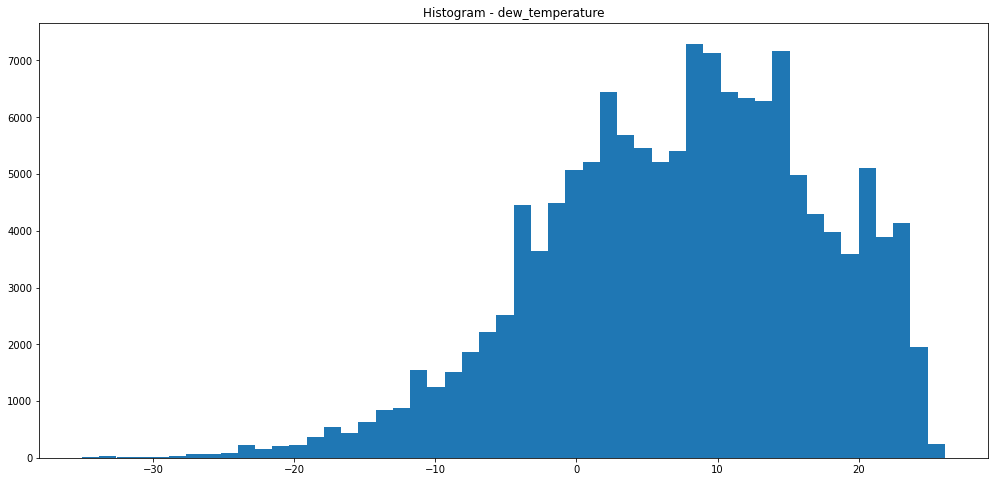

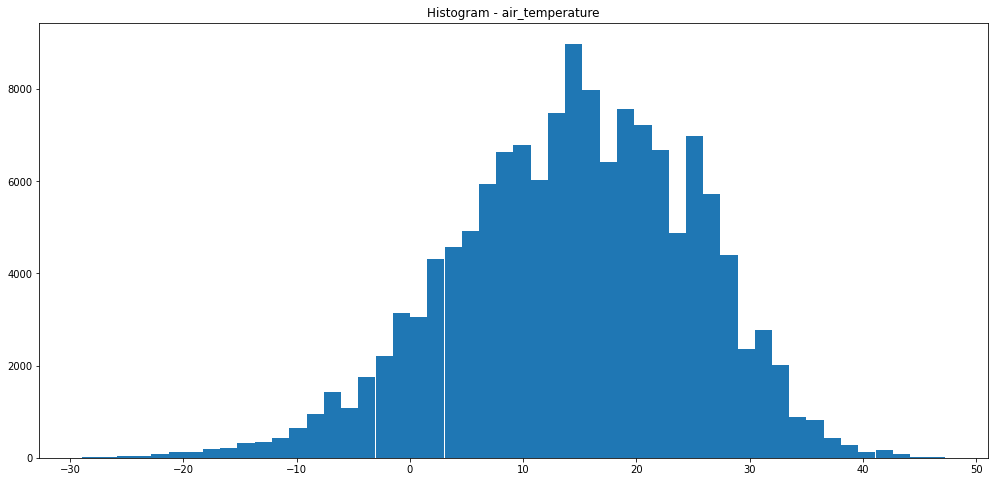

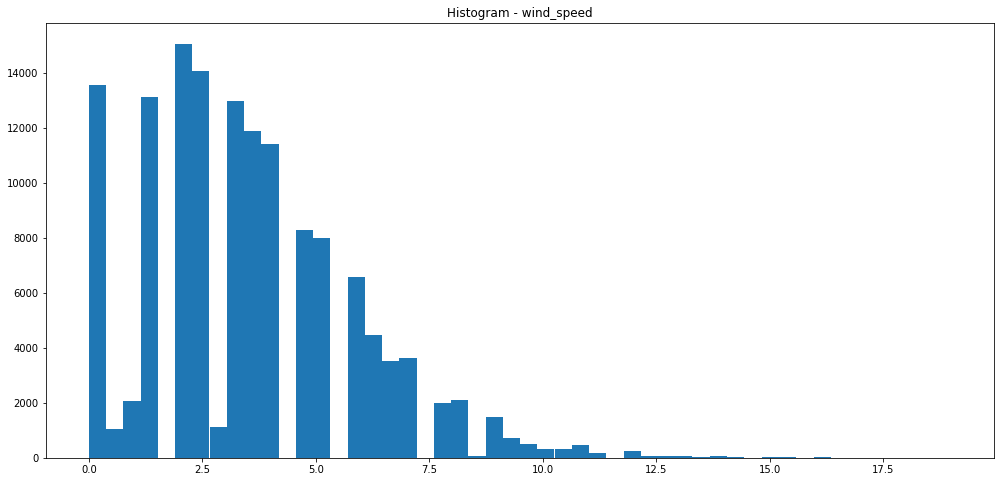

In [15]:
for var in ['dew_temperature','air_temperature','wind_speed']:
    plot_hist(Weather_Train,var)

<AxesSubplot:xlabel='air_temperature', ylabel='meter_reading'>

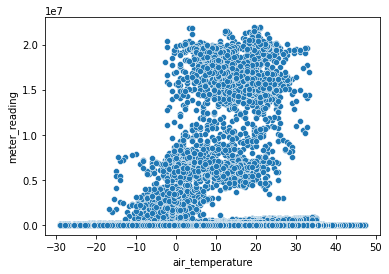

In [16]:
sns.scatterplot(x='air_temperature', y='meter_reading', data=data)

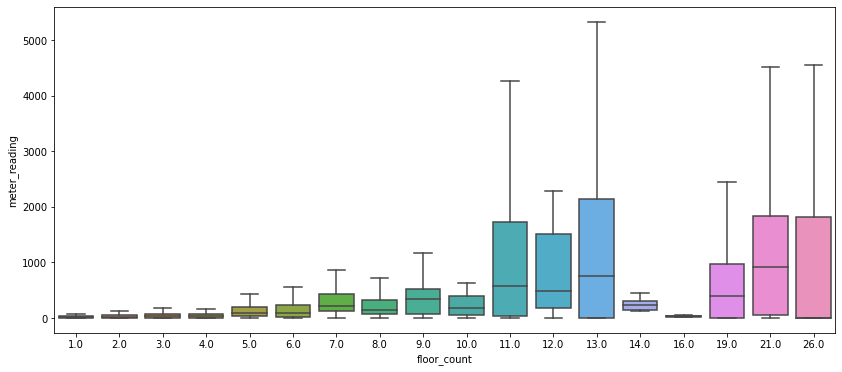

In [17]:
fig, axes = plt.subplots(1, 1, figsize=(14, 6))
sns.boxplot(x='floor_count', y='meter_reading', data=data, showfliers=False);

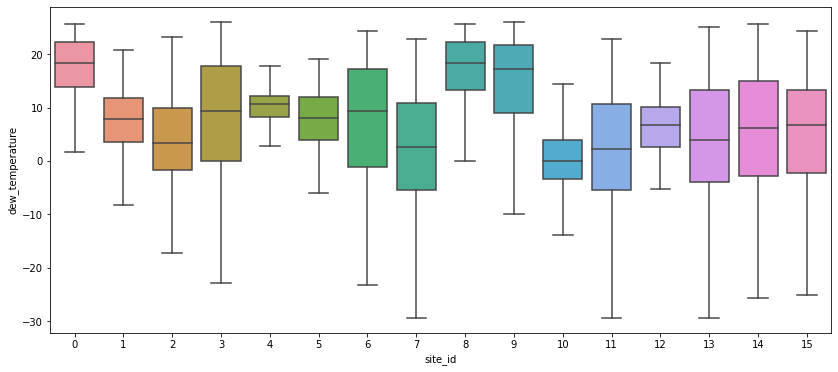

In [18]:
fig, axes = plt.subplots(1, 1, figsize=(14, 6))
sns.boxplot(x='site_id', y='dew_temperature', data=data, showfliers=False);

<AxesSubplot:>

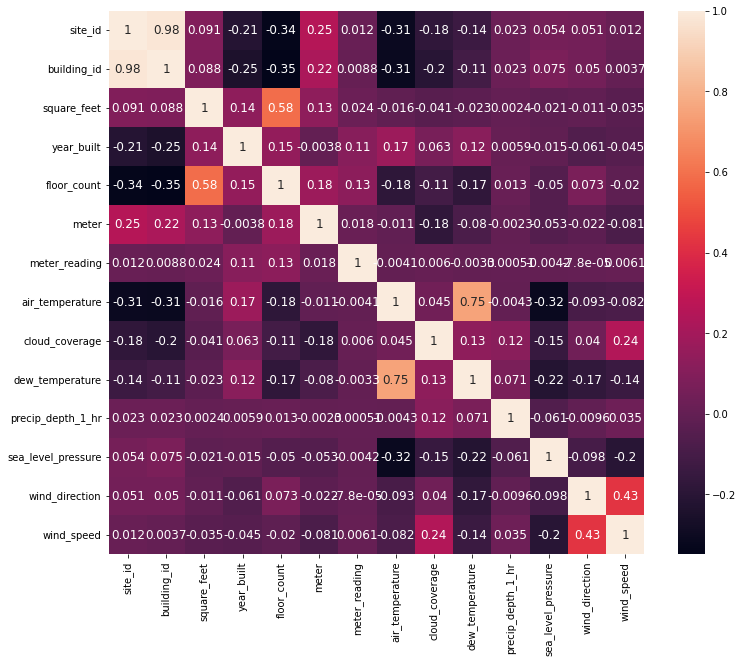

In [19]:
corrmat=data.corr()
fig,ax=plt.subplots(figsize=(12,10))
sns.heatmap(corrmat,annot=True,annot_kws={'size': 12})

In [20]:
# Eliminando columnas innecesarias
data = data.drop(columns=['year_built', 'floor_count', 'wind_direction', 'dew_temperature'])

In [21]:
# Arreglando el "timestamp" y tomando solo el día y el mes y luego soltando la columna de "timestamp"
data["timestamp"] = pd.to_datetime(data["timestamp"])
data["day"]= data["timestamp"].dt.day
data["month"]= data["timestamp"].dt.month
data['weekend'] = data['timestamp'].dt.dayofweek.isin([5,6]).astype('uint8')
data= data.drop("timestamp", axis = 1)

In [22]:
#Printing the "Percentage of missing values" to see what is going to be dropped and what is going to be filled
print("Percentage of missing values in the data dataset")
data.isna().sum()/len(data)*100

Percentage of missing values in the data dataset


site_id                0.000000
building_id            0.000000
primary_use            0.000000
square_feet            0.000000
meter                  0.000000
meter_reading          0.000000
air_temperature        0.478124
cloud_coverage        43.655131
precip_depth_1_hr     18.544739
sea_level_pressure     6.092515
wind_speed             0.710701
day                    0.000000
month                  0.000000
weekend                0.000000
dtype: float64

In [23]:
# Primeros registros de "data"
data.head()

,site_id,building_id,primary_use,square_feet,meter,meter_reading,air_temperature,cloud_coverage,precip_depth_1_hr,sea_level_pressure,wind_speed,day,month,weekend
0,0,0,Education,7432,0,0.0,25.000000,6.0,NaN,1019.5,0.000000,1,1,0
1,0,0,Education,7432,0,0.0,24.406250,NaN,-1.0,1020.0,1.500000,1,1,0
2,0,0,Education,7432,0,0.0,22.796875,2.0,0.0,1020.0,0.000000,1,1,0
3,0,0,Education,7432,0,0.0,21.093750,2.0,0.0,1020.0,0.000000,1,1,0
4,0,0,Education,7432,0,0.0,20.000000,2.0,-1.0,1020.0,2.599609,1,1,0


In [24]:
# Establece una lista de enteros que van desde 0 hasta la longitud de los datos como índice
data = data.reset_index()

In [25]:
# Cambio del tipo de datos a float 32 para completar el valor NA antes de transformarlos en "int" para un procesamiento de modelado sin problemas
data['wind_speed'] = data['wind_speed'].astype('float32')
data['air_temperature'] = data['air_temperature'].astype('float32')
data['precip_depth_1_hr'] = data['precip_depth_1_hr'].astype('float32')
data['cloud_coverage'] = data['cloud_coverage'].astype('float32')

In [26]:
# Llenando los valores nulos
data['precip_depth_1_hr'].fillna(data['precip_depth_1_hr'].mean(), inplace = True)
data['cloud_coverage'].fillna(data['cloud_coverage'].mean(), inplace = True)
data['wind_speed'].fillna(data['wind_speed'].mean(), inplace=True)
data['air_temperature'].fillna(data['air_temperature'].mean(), inplace=True)

# Suma de "nulls" dentro de las columnas
data.isnull().sum()

index                       0
site_id                     0
building_id                 0
primary_use                 0
square_feet                 0
meter                       0
meter_reading               0
air_temperature             0
cloud_coverage              0
precip_depth_1_hr           0
sea_level_pressure    1231669
wind_speed                  0
day                         0
month                       0
weekend                     0
dtype: int64

In [27]:
# Perfil de "results"
results.shape

(20216100, 9)

In [28]:
# Columnas de "results"
results.columns

Index(['site_id', 'building_id', 'primary_use', 'square_feet', 'year_built',
       'floor_count', 'meter', 'timestamp', 'meter_reading'],
      dtype='object')

In [29]:
# Perfil de "data"
data.shape

(20216100, 15)

In [30]:
# Columnas de "data"
data.columns

Index(['index', 'site_id', 'building_id', 'primary_use', 'square_feet',
       'meter', 'meter_reading', 'air_temperature', 'cloud_coverage',
       'precip_depth_1_hr', 'sea_level_pressure', 'wind_speed', 'day', 'month',
       'weekend'],
      dtype='object')

In [31]:
# Aquí la columna 'primaty_use' fue tratada por la función get_dummies y get_dummies se usa para la manipulación de datos
data_linearR = pd.get_dummies(data, columns=['primary_use'])

In [32]:
# Columnas de "data_linearR"
data_linearR.columns

Index(['index', 'site_id', 'building_id', 'square_feet', 'meter',
       'meter_reading', 'air_temperature', 'cloud_coverage',
       'precip_depth_1_hr', 'sea_level_pressure', 'wind_speed', 'day', 'month',
       'weekend', 'primary_use_Education',
       'primary_use_Entertainment/public assembly',
       'primary_use_Food sales and service', 'primary_use_Healthcare',
       'primary_use_Lodging/residential',
       'primary_use_Manufacturing/industrial', 'primary_use_Office',
       'primary_use_Other', 'primary_use_Parking',
       'primary_use_Public services', 'primary_use_Religious worship',
       'primary_use_Retail', 'primary_use_Services',
       'primary_use_Technology/science', 'primary_use_Utility',
       'primary_use_Warehouse/storage'],
      dtype='object')

In [33]:
#Using the important features 
X =data_linearR[['building_id', 'meter', 'air_temperature', 'wind_speed', 'precip_depth_1_hr', 'cloud_coverage',
       'square_feet', 'primary_use_Education', 'primary_use_Entertainment/public assembly',
       'primary_use_Food sales and service', 'primary_use_Healthcare',
       'primary_use_Lodging/residential',
       'primary_use_Manufacturing/industrial', 'primary_use_Office',
       'primary_use_Other', 'primary_use_Parking',
       'primary_use_Public services', 'primary_use_Religious worship',
       'primary_use_Retail', 'primary_use_Services',
       'primary_use_Technology/science', 'primary_use_Utility',
       'primary_use_Warehouse/storage', 'month', 'day','weekend']]

# Create target variable
y = data_linearR['meter_reading']

# Train, test, split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = .20, random_state= 0)

In [34]:
# Creación del objeto de regresión lineal
regressor = LinearRegression()

# Ajuste del modelo a los datos de entrenamiento
regressor.fit(X_train,y_train)

LinearRegression()

In [35]:
# Predicción de los resultados del conjunto de pruebas
y_pred = regressor.predict(X_test)

In [36]:
# R^2 y precisión del modelo lineal; Versión adaptada de: https://www.kaggle.com/code/abdelrahmanemad22/csci417-notebook-eda-features-eng-linear-reg-p1
print('Accuracy %d', regressor.score(X_test, y_test))
print('R^2 =', metrics.explained_variance_score(y_test,y_pred))
regressor.score(X_train,y_train)

Accuracy %d 0.0011691858143761946
R^2 = 0.0011702499876341532


0.0010959958274836534

In [37]:
tree_model = DecisionTreeRegressor(random_state=1)
tree_model.fit(X_train, y_train)

DecisionTreeRegressor(random_state=1)

In [38]:
meter_preds = tree_model.predict(X_test)
print(mean_absolute_error(y_test, meter_preds))

387.407899678713


In [39]:
for i in range(25):
    print(y_test.values[i],meter_preds[i])

102.28 95.80000305175781
0.0 0.0
288.116 259.7300109863281
63.067 64.57599639892578
17.05 18.09000015258789
359.848 380.1719970703125
4867.8 167.75
33.5859 29.084299087524414
348.0 370.0
0.0 0.0
244.236 257.8970031738281
15.6067 15.882466316223145
268.226 267.22601318359375
328.094 266.9880065917969
18.1667 18.16670036315918
619.431 565.968017578125
71.09 38.81999969482422
0.0 0.0
101.398 84.9739990234375
320.476 104.40399932861328
516.9 486.1000061035156
25.04 26.18000030517578
943.49 1153.5
184.283 183.54400634765625
77.25 541.9000244140625
